<Axes: title={'center': 'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

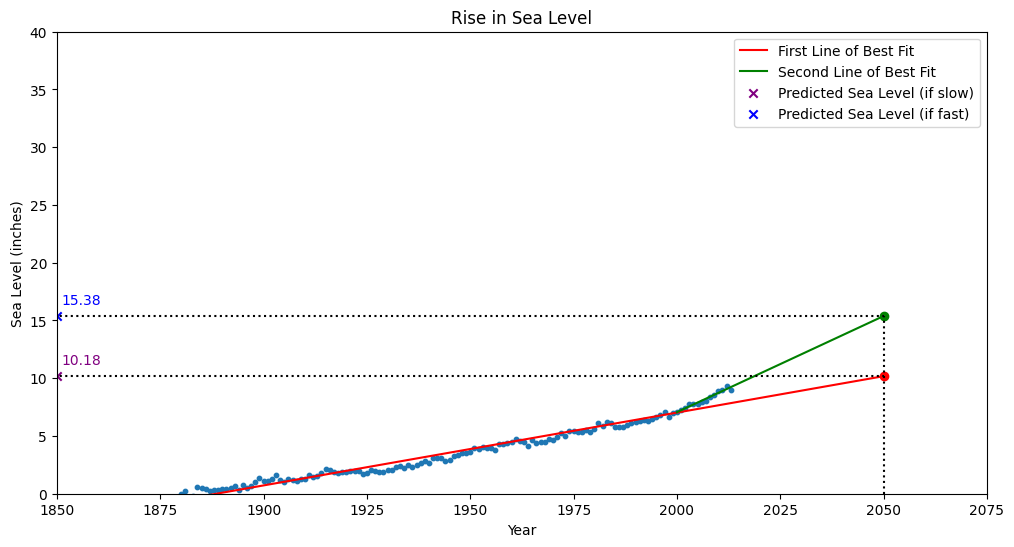

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def draw_plot():
    # === Load Data ===
    df = pd.read_csv('epa-sea-level.csv')  # Load sea level data from CSV file into a DataFrame

    # === Setup Plot ===
    fig, ax = plt.subplots(figsize=(12, 6))  # Create a figure and axis with specified size
    plt.scatter(x=df['Year'], y=df['CSIRO Adjusted Sea Level'], s=10)  # Plot scatter of actual sea level data
    ax.set_xlabel('Year')
    ax.set_xlim(df['Year'].min(), 2060)  # Set x-axis from earliest year to 2060 for future prediction
    ax.set_ylim(0, 40)  # Set y-axis range to accommodate visual space for trends
    ax.set_ylabel('Sea Level (inches)')
    ax.set_title('Rise in Sea Level')
    
    # Adjust the x-ticks to match expected values (1850, 1875, ..., 2075)
    plt.xticks(range(1850, 2080, 25))

    # === First Line of Best Fit (All Data) ===
    result_1 = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])  # Perform linear regression on all data
    years = pd.Series(range(df['Year'].min(), 2051))  # Create a Series from the first year to 2050 for prediction
    line_1 = result_1.slope * years + result_1.intercept  # Compute y-values for the regression line
    ax.plot(years, line_1, color='red', label='First Line of Best Fit')  # Plot the first regression line

    # === Second Line of Best Fit (From 2000) ===
    result_2 = linregress(df['Year'][(df['Year'] >= 2000)], df['CSIRO Adjusted Sea Level'][(df['Year'] >= 2000)])  # Regression using only data from year 2000 onward
    years_2 = pd.Series(range(2000, 2051))  # Create prediction years from 2000 to 2050
    line_2 = result_2.slope * years_2 + result_2.intercept  # Compute second regression line values
    ax.plot(years_2, line_2, color='green', label='Second Line of Best Fit')  # Plot the second regression line

    # === Predictions and Highlighting ===
    predicted_sea_level_2050_1 = result_1.slope * 2050 + result_1.intercept  # Predict sea level in 2050 using full data regression
    predicted_sea_level_2050_2 = result_2.slope * 2050 + result_2.intercept  # Predict sea level in 2050 using data from 2000 onward

    ax.plot([2050, 2050], [0, predicted_sea_level_2050_2], color='black', linestyle=':')  # Vertical line from x=2050 to show where prediction lies
    ax.plot([0, 2050], [predicted_sea_level_2050_1, predicted_sea_level_2050_1], color='black', linestyle=':')  # Horizontal line for first prediction level
    ax.plot([0, 2050], [predicted_sea_level_2050_2, predicted_sea_level_2050_2], color='black', linestyle=':')  # Horizontal line for second prediction level

    ax.scatter(2050, predicted_sea_level_2050_1, color='red')  # Highlight 2050 prediction point from full data
    ax.scatter(2050, predicted_sea_level_2050_2, color='green')  # Highlight 2050 prediction point from 2000 data
    ax.scatter(1850, predicted_sea_level_2050_1, color='purple', label='Predicted Sea Level (if slow)', marker='x')  # Backtrack 2050 estimate to starting year for visual trend
    ax.scatter(1850, predicted_sea_level_2050_2, color='blue', label='Predicted Sea Level (if fast)', marker='x')  # Same for 2000 onward estimate

    # === Text Annotations ===
    ax.text(1850 + 1, predicted_sea_level_2050_1 + 1, f'{predicted_sea_level_2050_1:.2f}', color='purple')  # Annotate first predicted level
    ax.text(1850 + 1, predicted_sea_level_2050_2 + 1, f'{predicted_sea_level_2050_2:.2f}', color='blue')  # Annotate second predicted level

    # === Legend, Save and Return ===
    ax.legend()  # Show legend for all labels
    plt.savefig('sea_level_plot.png')  # Save the final plot as a PNG file
    return plt.gca()  # Return the current axis for further use or testing

draw_plot()  # Call the function to execute the plotting logic


## Sea Level Rise Prediction and Visualization

This project analyzes and visualizes the rise in sea levels over time using historical data from the EPA. It applies linear regression to project future sea levels up to the year 2050.

### Data Source
The dataset `epa-sea-level.csv` contains sea level measurements from 1880 onwards, including:
- **Year**: The year the measurement was taken.
- **CSIRO Adjusted Sea Level**: Global mean sea level adjusted by CSIRO, in inches.

### Objective
- Visualize the original sea level data as a scatter plot.
- Plot a line of best fit using all available data.
- Plot a second line of best fit using data from the year 2000 onwards.
- Extend both lines to predict sea level in 2050.
- Annotate and compare the predicted sea levels from both models.

### Methodology
1. **Initial Visualization**:  
   - Plot the scatter of all data points using matplotlib.

2. **Linear Regression (All Data)**:  
   - Perform linear regression on the full dataset (1880 to the most recent year).
   - Predict sea level up to the year 2050 using this model.

3. **Linear Regression (From Year 2000)**:  
   - Perform a second linear regression using only data from 2000 onwards to capture accelerated changes.
   - Predict sea level up to 2050 using this newer trend.

4. **Plotting**:  
   - Draw both regression lines on the scatter plot.
   - Highlight predictions for 2050 using colored markers.
   - Add annotations and helper lines to visually compare the two predictions.

### Output
- **The final plot**:
   - Shows historical sea level data as blue points.
   - Includes two lines of best fit (one in red for full data, one in green for data from 2000).
   - Displays predicted sea levels for 2050 based on both regression models.
   - Saves the plot to `sea_level_plot.png`.

This visualization compares long-term and recent trends in sea level rise and highlights the importance of considering accelerated environmental changes in future projections.
